# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import gc
import Orange
import sys

sys.path.append("../../")

from tqdm import tqdm

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
competitors = ["ADWIN", "HDDM", "NEWMA", "ChangeFinder", "DDM", "Window", "FLOSS", "ClaSS"]
dataset = "SleepDB"
methods = list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(tqdm(methods)):
    methods[idx] = name, pd.read_csv(f"../../experiments/competitor_{dataset}/{file_name}",
                                     usecols=["dataset", eval_score], compression="gzip")
    gc.collect()

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

100%|█████████████████████████████████████████████| 3/3 [03:17<00:00, 65.84s/it]


,dataset,ClaSS,FLOSS,Window
0,SleepDB_SubjectST7011J0-PSG_EEG_Fpz-Cz,0.370,0.301,0.026
1,SleepDB_SubjectST7011J0-PSG_EEG_Pz-Oz,0.354,0.357,0.026
2,SleepDB_SubjectST7011J0-PSG_EOG_horizontal,0.369,0.274,0.026
3,SleepDB_SubjectST7011J0-PSG_EMG_submental,0.384,0.324,0.026
4,SleepDB_SubjectST7022J0-PSG_EEG_Fpz-Cz,0.523,0.418,0.030
5,SleepDB_SubjectST7022J0-PSG_EEG_Pz-Oz,0.392,0.364,0.030
6,SleepDB_SubjectST7022J0-PSG_EOG_horizontal,0.453,0.313,0.030
7,SleepDB_SubjectST7022J0-PSG_EMG_submental,0.382,0.223,0.030
8,SleepDB_SubjectST7041J0-PSG_EEG_Fpz-Cz,0.370,0.321,0.037
9,SleepDB_SubjectST7041J0-PSG_EEG_Pz-Oz,0.426,0.380,0.037


Let's calculate the mean/median/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1195/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


ClaSS     0.401
FLOSS     0.308
Window    0.036
dtype: float64

In [7]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1195/1729043111.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


ClaSS     0.400
FLOSS     0.314
Window    0.032
dtype: float64

In [8]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_1195/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


ClaSS     0.050
FLOSS     0.075
Window    0.013
dtype: float64

Let's compute the wins per method.

In [9]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [10]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

ClaSS:wins=75 rank=1.14773
FLOSS:wins=13 rank=1.85227
Window:wins=0 rank=3.0


Let's plot and output the ranks.

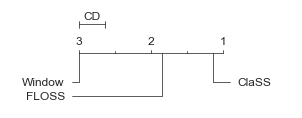

In [11]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4,
                                      filename=f"../../figures/cd_comparative_{dataset}.pdf")  #

Let's compute wins/losses against ClaSS.

In [12]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs FLOSS: (wins/ties/losses): 75/0/13
ClaSS vs Window: (wins/ties/losses): 88/0/0


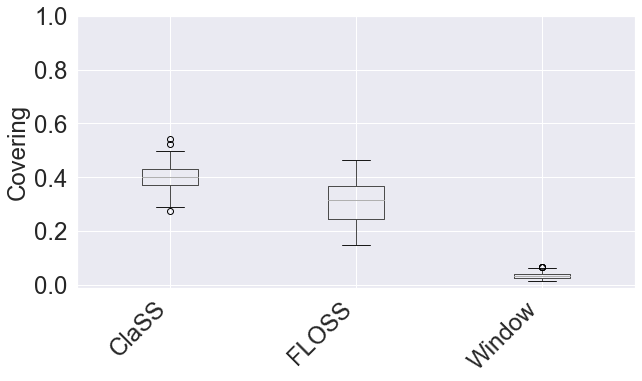

In [13]:
fontsize = 24
_, ax = plt.subplots(figsize=(10, 5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_comparative_{dataset}.pdf", bbox_inches="tight") 